In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.DataFrame()

In [4]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

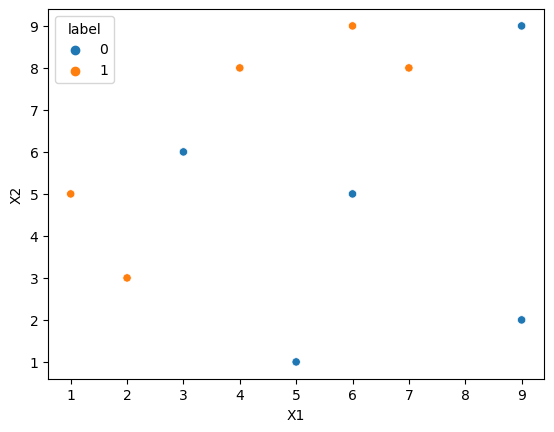

In [6]:
import seaborn as sns 
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])  

In [7]:
df['weights']=1/df.shape[0]

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt1=DecisionTreeClassifier(max_depth=1)

In [13]:
X=df.iloc[:,0:2].values

In [16]:
y=df.iloc[:,2].values

In [18]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

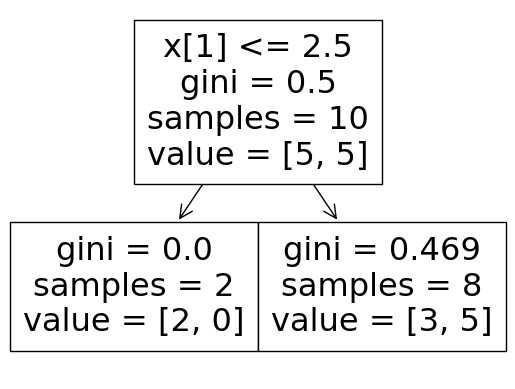

In [19]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

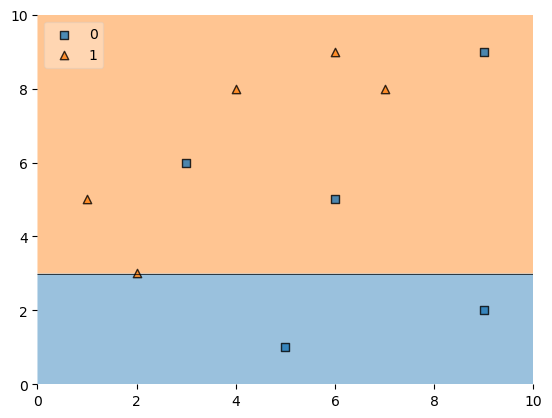

In [20]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [21]:
df['y_pred']=dt1.predict(X)

In [22]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [23]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [24]:
alpha1=calculate_model_weight(0.3)

In [25]:
alpha1

0.42364893019360184

In [26]:
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [28]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [29]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [30]:
df['updated_weights'].sum()

0.9165153319682015

In [31]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [32]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [33]:
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

In [34]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [35]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [36]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices


In [37]:
index_values=create_new_dataset(df)

In [38]:
index_values

[5, 8, 3, 9, 7, 6, 7, 1, 4, 3]

In [39]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [40]:
second_df

,X1,X2,label,weights
5,6,9,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
1,2,3,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1


In [41]:
dt2=DecisionTreeClassifier(max_depth=1)

In [42]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [43]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

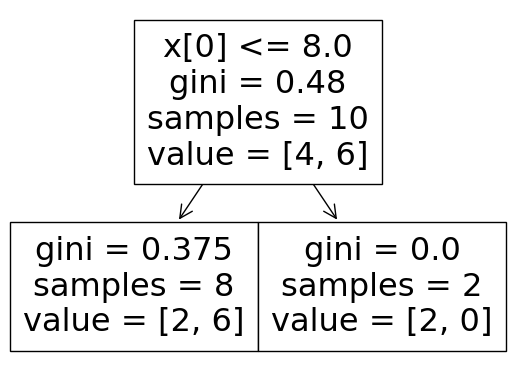

In [44]:
plot_tree(dt2)

<Axes: >

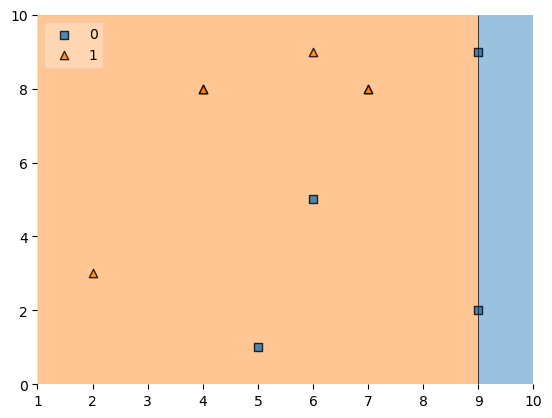

In [45]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [46]:


second_df['y_pred'] = dt2.predict(X)

In [47]:
second_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
9,9,2,0,0.1,0
7,7,8,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
1,2,3,1,0.1,1
4,5,1,0,0.1,1
3,4,8,1,0.1,1


In [48]:
alpha2=calculate_model_weight(0.1)

In [49]:
alpha2

1.0986122886681098

In [50]:

# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [51]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [52]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
6,6,5,0,0.1,1,0.297427
7,7,8,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
4,5,1,0,0.1,1,0.297427
3,4,8,1,0.1,1,0.033622


In [53]:
second_df['normalized_weights']=second_df['updated_weights']/second_df['updated_weights'].sum()

In [54]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
5,6,9,1,0.1,1,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
3,4,8,1,0.1,1,0.033622,0.038922
9,9,2,0,0.1,0,0.033622,0.038922
7,7,8,1,0.1,1,0.033622,0.038922
6,6,5,0,0.1,1,0.297427,0.344313
7,7,8,1,0.1,1,0.033622,0.038922
1,2,3,1,0.1,1,0.033622,0.038922
4,5,1,0,0.1,1,0.297427,0.344313
3,4,8,1,0.1,1,0.033622,0.038922


In [55]:
alpha2=calculate_model_weight(0.1)

In [56]:
alpha2

1.0986122886681098

In [57]:

# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [58]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [59]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
5,6,9,1,0.1,1,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
3,4,8,1,0.1,1,0.033622,0.038922
9,9,2,0,0.1,0,0.033622,0.038922
7,7,8,1,0.1,1,0.033622,0.038922
6,6,5,0,0.1,1,0.297427,0.344313
7,7,8,1,0.1,1,0.033622,0.038922
1,2,3,1,0.1,1,0.033622,0.038922
4,5,1,0,0.1,1,0.297427,0.344313
3,4,8,1,0.1,1,0.033622,0.038922


In [60]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
     

In [61]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,nomalized_weights
5,6,9,1,0.1,1,0.033622,0.038922,0.038922
8,9,9,0,0.1,0,0.033622,0.038922,0.038922
3,4,8,1,0.1,1,0.033622,0.038922,0.038922
9,9,2,0,0.1,0,0.033622,0.038922,0.038922
7,7,8,1,0.1,1,0.033622,0.038922,0.038922
6,6,5,0,0.1,1,0.297427,0.344313,0.344313
7,7,8,1,0.1,1,0.033622,0.038922,0.038922
1,2,3,1,0.1,1,0.033622,0.038922,0.038922
4,5,1,0,0.1,1,0.297427,0.344313,0.344313
3,4,8,1,0.1,1,0.033622,0.038922,0.038922


In [63]:
second_df.drop(['normalized_weights'],axis=1,inplace=True)

In [64]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
5,6,9,1,0.1,1,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
3,4,8,1,0.1,1,0.033622,0.038922
9,9,2,0,0.1,0,0.033622,0.038922
7,7,8,1,0.1,1,0.033622,0.038922
6,6,5,0,0.1,1,0.297427,0.344313
7,7,8,1,0.1,1,0.033622,0.038922
1,2,3,1,0.1,1,0.033622,0.038922
4,5,1,0,0.1,1,0.297427,0.344313
3,4,8,1,0.1,1,0.033622,0.038922


In [65]:

second_df['nomalized_weights'].sum()

0.9999999999999999

In [66]:

second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
     

In [68]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [69]:

index_values = create_new_dataset(second_df)

In [70]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [71]:
third_df

,X1,X2,label,weights
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1


In [72]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

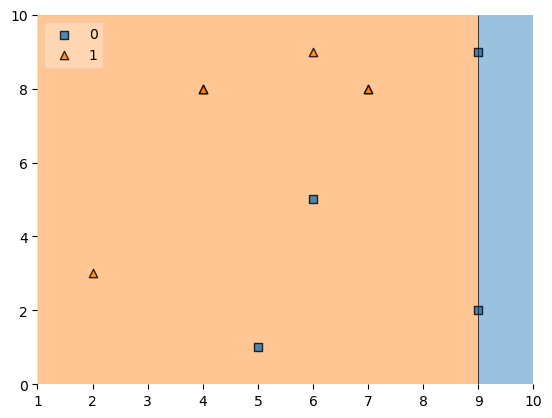

In [73]:


plot_decision_regions(X, y, clf=dt3, legend=2)
     

In [74]:

third_df['y_pred'] = dt3.predict(X)

In [75]:
third_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,1
7,7,8,1,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
7,7,8,1,0.1,1
9,9,2,0,0.1,1
3,4,8,1,0.1,1


In [76]:
alpha3 = calculate_model_weight(0.4)
alpha3
     

0.2027325540540821

In [77]:

print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 0.2027325540540821


# Prediction 

In [78]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [79]:

dt2.predict(query)

array([1], dtype=int64)

In [80]:


dt3.predict(query)
     

array([1], dtype=int64)

In [81]:
alpha1*1+alpha2*1+alpha3*1

1.7249937729157938

In [82]:
np.sign(1.09)

1.0